In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse


import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [3]:
houseprice_df.isnull().mean()*100

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [4]:
houseprice_df=houseprice_df.drop(['poolqc','fence','miscfeature','fireplacequ','alley','masvnrarea','masvnrtype','id','enclosedporch','utilities','threessnporch','screenporch','poolarea','miscval','lowqualfinsf'], axis=1)

In [5]:
houseprice_df=houseprice_df.dropna()

In [6]:
houseprice_df.shape

(1100, 66)

In [7]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1459
Data columns (total 66 columns):
mssubclass       1100 non-null int64
mszoning         1100 non-null object
lotfrontage      1100 non-null float64
lotarea          1100 non-null int64
street           1100 non-null object
lotshape         1100 non-null object
landcontour      1100 non-null object
lotconfig        1100 non-null object
landslope        1100 non-null object
neighborhood     1100 non-null object
condition1       1100 non-null object
condition2       1100 non-null object
bldgtype         1100 non-null object
housestyle       1100 non-null object
overallqual      1100 non-null int64
overallcond      1100 non-null int64
yearbuilt        1100 non-null int64
yearremodadd     1100 non-null int64
roofstyle        1100 non-null object
roofmatl         1100 non-null object
exterior1st      1100 non-null object
exterior2nd      1100 non-null object
exterqual        1100 non-null object
extercond        1100 no

In [8]:
houseprice_df.describe()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,...,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,mosold,yrsold,saleprice
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,56.095455,70.777273,10129.338182,6.255455,5.573636,1972.590909,1986.022727,449.500909,45.005455,606.204545,...,6.567273,0.609091,1978.711818,1.880909,504.279091,94.023636,47.342727,6.344545,2007.785455,187353.763636
std,41.948721,24.502185,8192.865984,1.369503,1.064369,31.198328,20.924024,469.376512,158.675214,445.736130,...,1.583014,0.632678,25.939098,0.657704,192.057703,122.509435,65.149201,2.700119,1.332511,83376.792992
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7622.250000,5.000000,5.000000,1953.750000,1967.000000,0.000000,0.000000,270.000000,...,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,50.000000,70.000000,9451.000000,6.000000,5.000000,1975.500000,1996.000000,385.500000,0.000000,525.000000,...,6.000000,1.000000,1983.000000,2.000000,484.000000,0.000000,28.000000,6.000000,2008.000000,167000.000000
75%,70.000000,80.000000,11396.500000,7.000000,6.000000,2003.000000,2005.000000,716.000000,0.000000,846.000000,...,7.000000,1.000000,2003.000000,2.000000,601.500000,169.250000,69.000000,8.000000,2009.000000,221125.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000


In [9]:
houseprice_df.corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,...,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,mosold,yrsold,saleprice
mssubclass,1.000000,-0.391541,-0.198935,0.029336,-0.084803,0.020683,0.009462,-0.068542,-0.073439,-0.149089,...,0.036674,-0.029792,0.050235,-0.032865,-0.096011,-0.019212,0.005359,-0.025869,-0.012884,-0.091081
lotfrontage,-0.391541,1.000000,0.420298,0.242899,-0.047572,0.108156,0.083225,0.238336,0.046597,0.114014,...,0.355523,0.260803,0.067620,0.286824,0.357374,0.082811,0.163140,0.015588,0.012303,0.345599
lotarea,-0.198935,0.420298,1.000000,0.169675,-0.033088,0.028470,0.023878,0.231216,0.138637,0.009919,...,0.242355,0.256122,0.012426,0.173786,0.213082,0.134722,0.097896,0.006075,-0.006603,0.301753
overallqual,0.029336,0.242899,0.169675,1.000000,-0.191135,0.592105,0.569744,0.234414,-0.082546,0.295302,...,0.462356,0.407301,0.563901,0.606591,0.557092,0.271930,0.342254,0.085185,-0.006339,0.796663
overallcond,-0.084803,-0.047572,-0.033088,-0.191135,1.000000,-0.438151,0.022457,-0.070274,0.041154,-0.168901,...,-0.091779,-0.030181,-0.354102,-0.270170,-0.234219,-0.018066,-0.087580,-0.011844,0.047077,-0.139560
yearbuilt,0.020683,0.108156,0.028470,0.592105,-0.438151,1.000000,0.627888,0.235316,-0.060422,0.169543,...,0.115229,0.125485,0.825193,0.533439,0.471438,0.232705,0.239190,0.017758,-0.004236,0.523170
yearremodadd,0.009462,0.083225,0.023878,0.569744,0.022457,0.627888,1.000000,0.113310,-0.065095,0.187092,...,0.180204,0.110991,0.650125,0.474205,0.414723,0.237381,0.262322,0.034601,0.036922,0.519407
bsmtfinsf1,-0.068542,0.238336,0.231216,0.234414,-0.070274,0.235316,0.113310,1.000000,-0.046919,-0.550315,...,0.082893,0.264715,0.156914,0.197341,0.286028,0.197920,0.125915,-0.014669,0.012628,0.381634
bsmtfinsf2,-0.073439,0.046597,0.138637,-0.082546,0.041154,-0.060422,-0.065095,-0.046919,1.000000,-0.239376,...,-0.055060,0.018611,-0.082188,-0.081760,-0.055758,0.031409,0.007199,-0.040643,0.036667,-0.037812
bsmtunfsf,-0.149089,0.114014,0.009919,0.295302,-0.168901,0.169543,0.187092,-0.550315,-0.239376,1.000000,...,0.229047,0.039154,0.200128,0.276610,0.229380,-0.011837,0.138291,0.031172,-0.018221,0.189847


In [10]:
cat1=pd.DataFrame(houseprice_df.groupby('salecondition')['saleprice'].mean()).reset_index()
cat2=pd.DataFrame(houseprice_df.groupby('street')['saleprice'].mean()).reset_index()
cat3=pd.DataFrame(houseprice_df.groupby('saletype')['saleprice'].mean()).reset_index()
cat4=pd.DataFrame(houseprice_df.groupby('electrical')['saleprice'].mean()).reset_index()
cat5=pd.DataFrame(houseprice_df.groupby('garagequal')['saleprice'].mean()).reset_index()
cat6=pd.DataFrame(houseprice_df.groupby('kitchenqual')['saleprice'].mean()).reset_index()
cat7=pd.DataFrame(houseprice_df.groupby('exterqual')['saleprice'].mean()).reset_index()
cat8=pd.DataFrame(houseprice_df.groupby('neighborhood')['saleprice'].mean()).reset_index()
cat9=pd.DataFrame(houseprice_df.groupby('heating')['saleprice'].mean()).reset_index()
cat10=pd.DataFrame(houseprice_df.groupby('bsmtqual')['saleprice'].mean()).reset_index()
cat11=pd.DataFrame(houseprice_df.groupby('bldgtype')['saleprice'].mean()).reset_index()
cat12=pd.DataFrame(houseprice_df.groupby('functional')['saleprice'].mean()).reset_index()
cat13=pd.DataFrame(houseprice_df.groupby('roofstyle')['saleprice'].mean()).reset_index()
cat14=pd.DataFrame(houseprice_df.groupby('garagetype')['saleprice'].mean()).reset_index()
cat15=pd.DataFrame(houseprice_df.groupby('centralair')['saleprice'].mean()).reset_index()

Text(0.5, 1.0, 'centralair type')

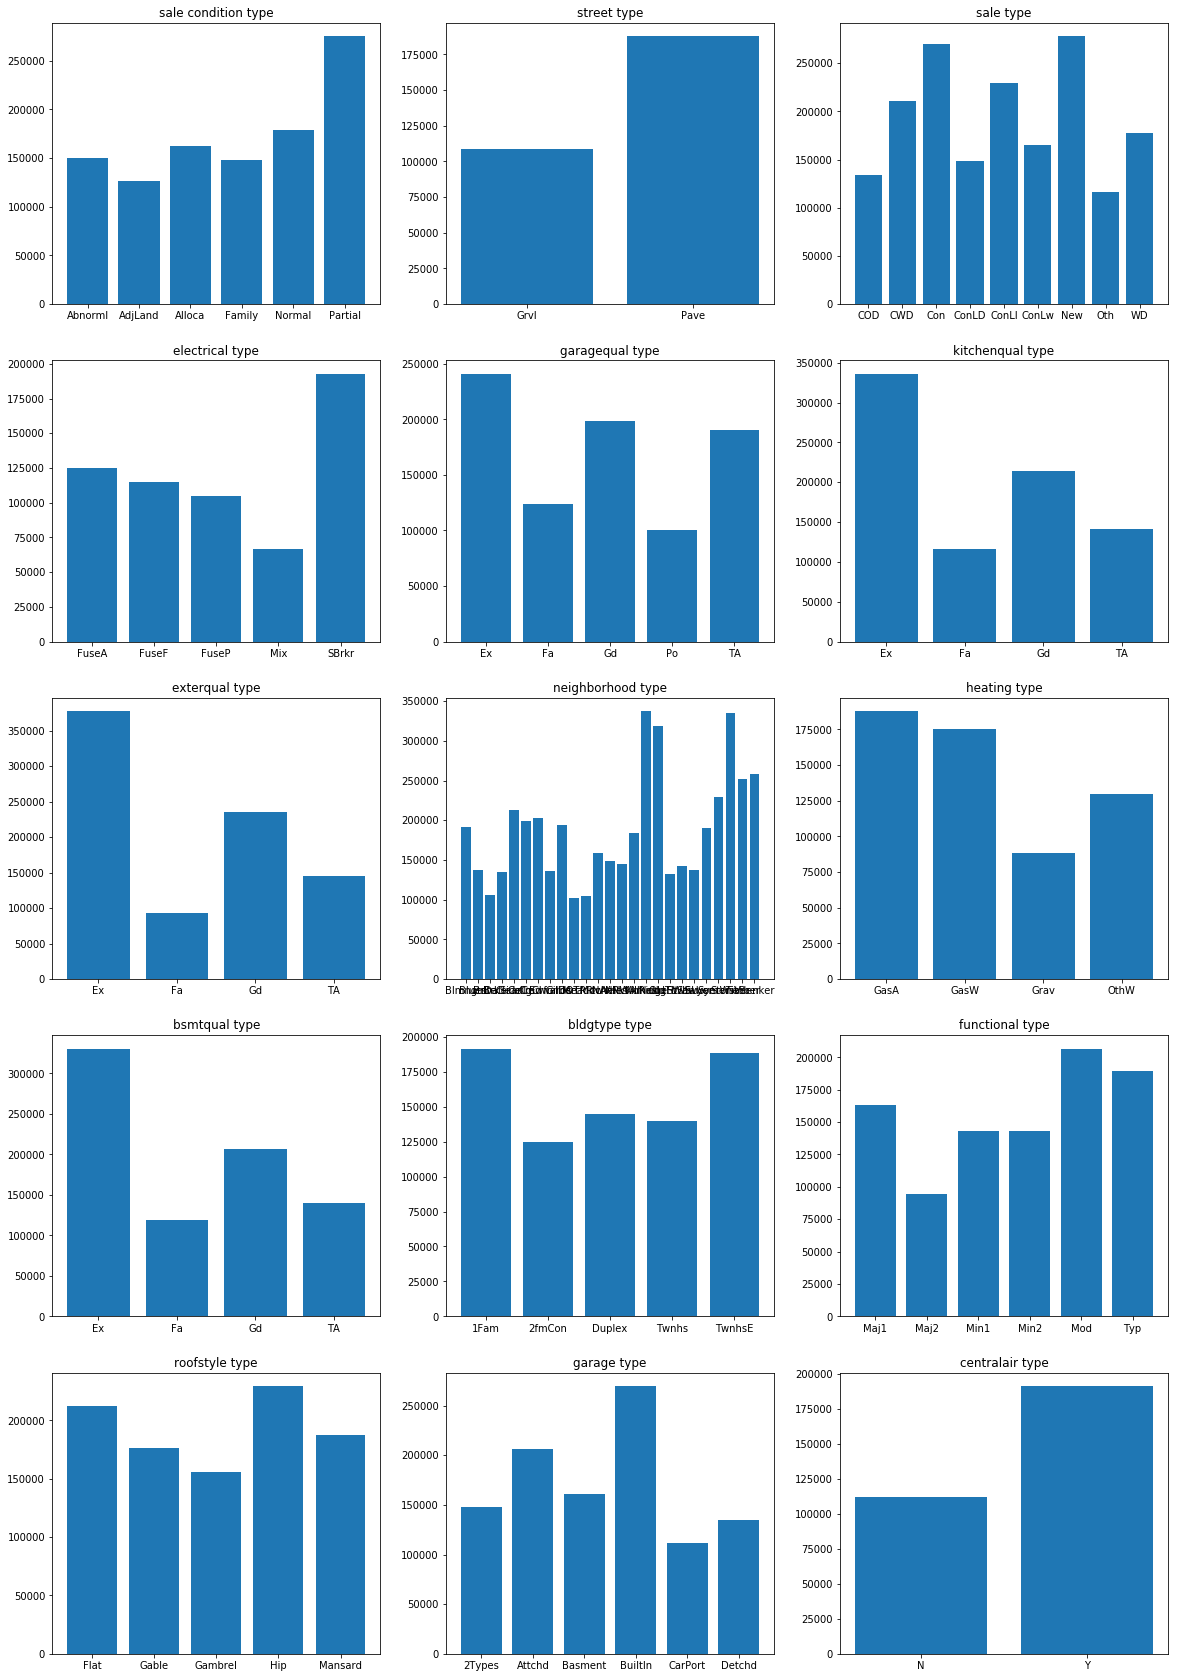

In [11]:
plt.figure(figsize=(20,30))
plt.subplot(5,3,1)
plt.bar(cat1['salecondition'],cat1['saleprice'])
plt.title('sale condition type')

plt.subplot(5,3,2)
plt.bar(cat2['street'],cat2['saleprice'])
plt.title('street type')

plt.subplot(5,3,3)
plt.bar(cat3['saletype'],cat3['saleprice'])
plt.title('sale type')

plt.subplot(5,3,4)
plt.bar(cat4['electrical'],cat4['saleprice'])
plt.title('electrical type')

plt.subplot(5,3,5)
plt.bar(cat5['garagequal'],cat5['saleprice'])
plt.title('garagequal type')

plt.subplot(5,3,6)
plt.bar(cat6['kitchenqual'],cat6['saleprice'])
plt.title('kitchenqual type')

plt.subplot(5,3,7)
plt.bar(cat7['exterqual'],cat7['saleprice'])
plt.title('exterqual type')

plt.subplot(5,3,8)
plt.bar(cat8['neighborhood'],cat8['saleprice'])
plt.title('neighborhood type')

plt.subplot(5,3,9)
plt.bar(cat9['heating'],cat9['saleprice'])
plt.title('heating type')

plt.subplot(5,3,10)
plt.bar(cat10['bsmtqual'],cat10['saleprice'])
plt.title('bsmtqual type')

plt.subplot(5,3,11)
plt.bar(cat11['bldgtype'],cat11['saleprice'])
plt.title('bldgtype type')

plt.subplot(5,3,12)
plt.bar(cat12['functional'],cat12['saleprice'])
plt.title('functional type')

plt.subplot(5,3,13)
plt.bar(cat13['roofstyle'],cat13['saleprice'])
plt.title('roofstyle type')

plt.subplot(5,3,14)
plt.bar(cat14['garagetype'],cat14['saleprice'])
plt.title('garage type')

plt.subplot(5,3,15)
plt.bar(cat15['centralair'],cat15['saleprice'])
plt.title('centralair type')

In [12]:
def sale_condition():
    salecondition=[]
    for x in houseprice_df['salecondition']:
        if x == 'Partial':
            salecondition.append('Partial')
        else:
            salecondition.append('Other')
    return salecondition

houseprice_df['salecondition']=sale_condition()

In [13]:
def street_type():
    streettype=[]
    for x in houseprice_df['street']:
        if x == 'Pave':
            streettype.append('Pave')
        else:
            streettype.append('Other')
    return streettype

houseprice_df['street']=street_type()

In [14]:
def electrical_type():
    electric=[]
    for x in houseprice_df['electrical']:
        if x == 'SBrkr':
            electric.append('SBrkr')
        else:
            electric.append('Other')
    return electric

houseprice_df['electrical']=electrical_type()

In [15]:
def kitchenqual_type():
    kitchen_qual=[]
    for x in houseprice_df['kitchenqual']:
        if x == 'Ex':
            kitchen_qual.append(x)
        else:
            kitchen_qual.append('Other')
    return kitchen_qual

houseprice_df['kitchenqual']=kitchenqual_type()

In [16]:
def exterqual_type():
    exter_qual=[]
    for x in houseprice_df['exterqual']:
        if x == 'Ex':
            exter_qual.append(x)
        else:
            exter_qual.append('Other')
    return exter_qual

houseprice_df['exterqual']=exterqual_type()

In [17]:
def centralair_type():
    centralair_type=[]
    for x in houseprice_df['centralair']:
        if x == 'Y':
            centralair_type.append(x)
        else:
            centralair_type.append('Other')
    return centralair_type

houseprice_df['centralair']=centralair_type()

In [18]:
def garage_type():
    garage_type=[]
    for x in houseprice_df['garagetype']:
        if x == 'BuiltIn':
            garage_type.append(x)
        else:
            garage_type.append('Other')
    return garage_type

houseprice_df['garagetype']=garage_type()

In [19]:
houseprice_df['salecondition']=pd.get_dummies(houseprice_df.street, drop_first=True)
houseprice_df['streettype']=pd.get_dummies(houseprice_df.centralair, drop_first=True)
houseprice_df['electrical']=pd.get_dummies(houseprice_df.street, drop_first=True)
houseprice_df['kitchenqual']=pd.get_dummies(houseprice_df.centralair, drop_first=True)
houseprice_df['exterqual']=pd.get_dummies(houseprice_df.street, drop_first=True)
houseprice_df['centralair']=pd.get_dummies(houseprice_df.centralair, drop_first=True)
houseprice_df['garagetype']=pd.get_dummies(houseprice_df.street, drop_first=True)

In [20]:
houseprice_df['garage']=houseprice_df['garagecars']*houseprice_df['garagearea']

In [21]:
houseprice_df['grlivarea_totrmsabvgrd']=houseprice_df['grlivarea']*houseprice_df['totrmsabvgrd']

In [22]:
x=houseprice_df[['electrical','centralair','overallqual','yearbuilt','yearremodadd','firstflrsf','secondflrsf','totalbsmtsf','grlivarea_totrmsabvgrd','fullbath','garage']]
y=houseprice_df['saleprice']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from statsmodels.tools.eval_measures import mse, rmse

In [25]:
linear=LinearRegression()
linear.fit(x_train,y_train)

y_test_predicted=linear.predict(x_test)

In [26]:
print(linear.score(x_train,y_train))
print(linear.score(x_test,y_test))
print(mse(y_test,y_test_predicted))
print(rmse(y_test,y_test_predicted))

0.7630283406605102
0.8153566356246773
1069953480.0156794
32710.143381154405


In [27]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [28]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(x_train, y_train)
y_preds_test = lasso_cv.predict(x_test)

In [29]:
print(lasso_cv.alpha_)
print(lasso_cv.score(x_test, y_test))
print(mse(y_test,y_preds_test))
print(rmse(y_test,y_preds_test))

100.0
0.8140766296639057
1077370734.5528345
32823.32607388889


In [30]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(x_train, y_train)
ridge_y_test_predicted = ridge_cv.predict(x_test)

In [31]:
print(ridge_cv.alpha_)
print(ridge_cv.score(x_test, y_test))
print(mse(y_test,ridge_y_test_predicted))
print(rmse(y_test,ridge_y_test_predicted))

10.0
0.8144971846749542
1074933743.1173077
32786.18219795205


In [32]:
#based on each model's (OLS regression, lasso, ridge) r-squared, mse, rmse values, OLS regression is the
#best model to use.

In [36]:
#data=pd.DataFrame(houseprice_df.groupby(['mosold','yrsold']).count()).reset_index()
#data=data.reindex(data.index.repeat(data.mssubclass))
#data.iloc[:,0:3]

In [34]:
repeat_list=[7,6,21,21,30,37,55,18,15,20,11,7,11,7,11,19,32,41,41,28,9,11,21,15,10,10,12,19,26,38,35,26,9,19,14,11,8,8,14,21,27,38,50,22,17,21,14,8,8,11,17,26,34,29,4]

In [47]:
fed_funds_rate=pd.read_csv('Downloads/FEDFUNDS.csv')
fed_funds_rate['months']=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7]
fed_funds_rate['year']=[2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2006,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2009,2010,2010,2010,2010,2010,2010,2010]
fed_funds_rate=fed_funds_rate.reindex(fed_funds_rate.index.repeat(repeat_list))
r=list(fed_funds_rate['FEDFUNDS'])

In [61]:
houseprice_df=houseprice_df.sort_values(['mosold', 'yrsold'], ascending=True)
houseprice_df['rate']=r
houseprice_df.head(10)

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,lotconfig,landslope,neighborhood,...,openporchsf,mosold,yrsold,saletype,salecondition,saleprice,streettype,garage,grlivarea_totrmsabvgrd,rate
142,20,RL,78.0,11645,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,24,1,2006,WD,1,260000,1,1320,12138,4.29
303,20,RL,118.0,13704,Pave,IR1,Lvl,Corner,Gtl,CollgCr,...,81,1,2006,WD,1,205000,1,2529,9246,4.29
412,190,RL,100.0,34650,Pave,Reg,Bnk,Inside,Gtl,Gilbert,...,0,1,2006,WD,1,145000,0,1144,5280,4.29
664,20,RL,49.0,20896,Pave,IR2,Lvl,CulDSac,Gtl,Somerst,...,267,1,2006,New,1,423000,1,3402,16776,4.29
810,20,RL,78.0,10140,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,0,1,2006,WD,1,181000,1,968,6545,4.29
1040,20,RL,88.0,13125,Pave,Reg,Lvl,Corner,Gtl,Sawyer,...,0,1,2006,WD,1,155000,1,968,14424,4.29
1404,50,RL,60.0,10410,Pave,Reg,Lvl,Corner,Gtl,OldTown,...,0,1,2006,WD,1,105000,1,2808,7284,4.29
49,20,RL,66.0,7742,Pave,Reg,Lvl,Inside,Gtl,Sawyer,...,0,1,2007,WD,1,127000,1,386,5730,4.49
151,20,RL,120.0,10356,Pave,Reg,Lvl,Corner,Gtl,CollgCr,...,0,1,2007,WD,1,122000,1,880,4845,4.49
281,60,RL,82.0,11287,Pave,Reg,Lvl,Inside,Gtl,SawyerW,...,84,1,2007,WD,1,228500,1,1150,13874,4.49


In [50]:
a=houseprice_df[['electrical','centralair','overallqual','yearbuilt','yearremodadd','firstflrsf','secondflrsf','totalbsmtsf','grlivarea_totrmsabvgrd','fullbath','garage','rate']]
b=houseprice_df['saleprice']

In [51]:
a_train,a_test,b_train,b_test=train_test_split(a,b, test_size=0.2, random_state=0)

In [54]:
linear=LinearRegression()
linear.fit(a_train,b_train)

b_test_predicted=linear.predict(a_test)

In [55]:
print(linear.score(a_train,b_train))
print(linear.score(a_test,b_test))
print(mse(b_test,b_test_predicted))
print(rmse(b_test,b_test_predicted))

0.7664591759462672
0.7966908413469954
1218412159.9527075
34905.76112839695


In [56]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(a_train, b_train)
b_preds_test = lasso_cv.predict(a_test)

In [57]:
print(lasso_cv.alpha_)
print(lasso_cv.score(a_test, b_test))
print(mse(b_test,b_preds_test))
print(rmse(b_test,b_preds_test))

1000.0
0.7971429507728012
1215702711.8113618
34866.928626011235


In [58]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(a_train, b_train)
ridge_b_test_predicted = ridge_cv.predict(a_test)

In [59]:
print(ridge_cv.alpha_)
print(ridge_cv.score(a_test, b_test))
print(mse(b_test,ridge_b_test_predicted))
print(rmse(b_test,ridge_b_test_predicted))

100.0
0.8006584934417881
1194634403.9933312
34563.483678491255


In [60]:
#In conclusion, OLS model WITHOUT the external feature (fed funds rate) added still performed the best
#when each model's predictive powers were compared.